In [1]:
import pandas as pd
import requests
import statsapi
import matplotlib.pyplot as plt

## Lookup team

In [2]:
statsapi.lookup_team(147)

[{'id': 147,
  'name': 'New York Yankees',
  'teamCode': 'nya',
  'fileCode': 'nyy',
  'teamName': 'Yankees',
  'locationName': 'Bronx',
  'shortName': 'NY Yankees'}]

## Generating standings

In [3]:
league_mapping = {103: "American League", 104: "National League"}

lea_div_dict = {103: [200, 201, 202], 104: [203, 204, 205]} 

league_standings_dict = {}
division_standings_dict = {}

for league in lea_div_dict.keys():
    league_list = []
    division_standings_dict[league_mapping[league]] = {}
    for division in lea_div_dict[league]:
        division_results = pd.DataFrame(statsapi.standings_data(league)[division]['teams'])
        league_list.append(division_results)
        division_standings_dict[league_mapping[league]][division] = division_results
    league_standings_dict[league_mapping[league]] = pd.concat(league_list, axis = 0)

In [4]:
league_standings_dict["American League"].sort_values("w",ascending=False)

,name,div_rank,w,l,gb,wc_rank,wc_gb,wc_elim_num,elim_num,team_id,league_rank,sport_rank
0,Houston Astros,1,85,48,-,-,-,-,-,117,1,1
0,New York Yankees,1,79,54,-,-,-,-,-,147,2,2
1,Seattle Mariners,2,75,58,10.0,2,+2.0,-,20,136,4,4
1,Tampa Bay Rays,2,74,57,4.0,1,+2.0,-,27,139,3,3
2,Toronto Blue Jays,3,72,59,6.0,3,-,-,25,141,5,5
3,Baltimore Orioles,4,71,61,7.5,4,1.5,30,23,110,6,6
0,Cleveland Guardians,1,68,63,-,-,-,-,-,114,7,7
1,Minnesota Twins,2,67,64,1.0,5,5.0,27,31,142,8,8
2,Chicago White Sox,3,67,66,2.0,6,6.0,25,29,145,9,9
4,Boston Red Sox,5,66,68,13.5,7,7.5,23,16,111,10,10


In [5]:
league_standings_dict["National League"].style.to_latex()

'\\begin{tabular}{lllrrlllllrll}\n & name & div_rank & w & l & gb & wc_rank & wc_gb & wc_elim_num & elim_num & team_id & league_rank & sport_rank \\\\\n0 & Los Angeles Dodgers & 1 & 91 & 41 & - & - & - & - & - & 119 & 1 & 1 \\\\\n1 & San Diego Padres & 2 & 74 & 60 & 18.0 & 2 & +0.5 & - & 12 & 135 & 5 & 5 \\\\\n2 & San Francisco Giants & 3 & 63 & 68 & 27.5 & 5 & 9.0 & 22 & 4 & 137 & 8 & 8 \\\\\n3 & Arizona Diamondbacks & 4 & 63 & 69 & 28.0 & 6 & 9.5 & 21 & 3 & 109 & 9 & 9 \\\\\n4 & Colorado Rockies & 5 & 56 & 77 & 35.5 & 8 & 17.0 & 13 & E & 115 & 11 & 11 \\\\\n0 & New York Mets & 1 & 85 & 49 & - & - & - & - & - & 121 & 2 & 2 \\\\\n1 & Atlanta Braves & 2 & 83 & 51 & 2.0 & 1 & +9.5 & - & 27 & 144 & 3 & 3 \\\\\n2 & Philadelphia Phillies & 3 & 73 & 60 & 11.5 & 3 & - & - & 18 & 143 & 6 & 6 \\\\\n3 & Miami Marlins & 4 & 55 & 77 & 29.0 & 9 & 17.5 & 13 & 1 & 146 & 12 & 12 \\\\\n4 & Washington Nationals & 5 & 46 & 87 & 38.5 & 12 & 27.0 & 3 & E & 120 & 15 & 15 \\\\\n0 & St. Louis Cardinals & 1 & 

# Individual player stats

In [1]:
'hello'.rjust(4)

'hello'

First, let us use the league standings to determine the different teams.

In [6]:
amer_league_standings = league_standings_dict["National League"]

In [7]:
amer_league_team_info = {team: statsapi.lookup_team(team) for team in amer_league_standings}

Now that we have the team ids, we can investigate their roster information.

In [8]:
amer_league_team_rosters = {team_id: statsapi.roster(team_id).split('\n') for team_id in amer_league_standings["team_id"].values}

Now we have the list of players that the team has used.

In [9]:
amer_league_team_rosters_player_names = {team_id: [' '.join(player.split(' ')[-2:]) 
for player in amer_league_team_rosters[team_id]]
for team_id in amer_league_standings["team_id"].values}

With the list of names, we can look up the players and check their stats. Let us first look at one example, the Houston Astros:

In [12]:
amer_league_team_rosters_player_names[119][:5]

['Alex Vesia',
 'Andrew Heaney',
 'Austin Barnes',
 'Caleb Ferguson',
 'Chris Martin']

For each player name, we can extract an id, which we will later use to determine the player individual stats.

## Houston Astros Example

In [13]:
astros_name_ids = {player_name: statsapi.lookup_player(player_name)[0]['id'] for player_name in amer_league_team_rosters_player_names[117]}

In [14]:
astros_name_ids[list(astros_name_ids.keys())[0]]

608324

In [15]:
astros_name_ids

{'Alex Bregman': 608324,
 'Bryan Abreu': 650556,
 'Chas McCormick': 676801,
 'Christian Vazquez': 543877,
 'Cristian Javier': 664299,
 'David Hensley': 682073,
 'Framber Valdez': 664285,
 'Hector Neris': 593576,
 'Jake Meyers': 676694,
 'Jeremy Pena': 665161,
 'Jose Altuve': 514888,
 'Jose Urquidy': 664353,
 'Justin Verlander': 434378,
 'Kyle Tucker': 663656,
 'McCullers Jr.': 621121,
 'Luis Garcia': 671277,
 'Martin Maldonado': 455117,
 'Mauricio Dubon': 643289,
 'Phil Maton': 664208,
 'Rafael Montero': 606160,
 'Ryne Stanek': 592773,
 'Seth Martinez': 661527,
 'Trey Mancini': 641820,
 'Will Smith': 669257,
 'Yordan Alvarez': 670541,
 'Yuli Gurriel': 493329,
 '': 676265}

In [16]:
astros_stats_json = {}
corrected_astros_name_ids = {}
unactive_player_dict = {} # this is a list of playerid

for name, id in astros_name_ids.items():
    try:
        astros_stats_json[name] = statsapi.player_stats(id).split('\n')
        corrected_astros_name_ids[name] = id
    except TypeError:
        unactive_player_dict[name] = id


In [17]:
astros_stats_json[list(astros_stats_json.keys())[0]]

['Alex "A-Breg" Bregman, 3B (2016-)',
 '',
 'Season Hitting',
 'gamesPlayed: 122',
 'groundOuts: 105',
 'airOuts: 158',
 'runs: 77',
 'doubles: 34',
 'triples: 0',
 'homeRuns: 19',
 'strikeOuts: 63',
 'baseOnBalls: 67',
 'intentionalWalks: 1',
 'hits: 118',
 'hitByPitch: 7',
 'avg: .269',
 'atBats: 438',
 'obp: .371',
 'slg: .477',
 'ops: .848',
 'caughtStealing: 1',
 'stolenBases: 1',
 'stolenBasePercentage: .500',
 'groundIntoDoublePlay: 15',
 'numberOfPitches: 1971',
 'plateAppearances: 518',
 'totalBases: 209',
 'rbi: 75',
 'leftOnBase: 200',
 'sacBunts: 0',
 'sacFlies: 6',
 'babip: .273',
 'groundOutsToAirouts: 0.66',
 'catchersInterference: 0',
 'atBatsPerHomeRun: 23.05',
 '',
 'Season Fielding (3B)',
 'gamesPlayed: 121',
 'gamesStarted: 120',
 'assists: 198',
 'putOuts: 118',
 'errors: 6',
 'chances: 322',
 'fielding: .981',
 'rangeFactorPerGame: 2.61',
 'rangeFactorPer9Inn: 2.68',
 'innings: 1063.2',
 'games: 121',
 'doublePlays: 30',
 'triplePlays: 0',
 'throwingErrors: 3',
 '

The idea would be to create a roster table per team, where the primary keys are the player ids (or the names), and then have the hitting or pitching stats.

In [18]:
astros_stats = pd.DataFrame({astros_name_ids[player]: {stat.split(': ')[0] : stat.split(': ')[1]  
for stat in astros_stats_json[player] 
if ':' in stat} for player in astros_stats_json.keys()}).T

In [19]:
astros_stats['playername'] = corrected_astros_name_ids.keys()

In [20]:
str({1:{1}})

'{1: {1}}'

## American League Example

In [13]:
amer_league_team_rosters_player_names.keys()

dict_keys([119, 135, 109, 137, 115, 121, 144, 143, 146, 120, 138, 158, 112, 113, 134])

In [14]:
def generate_player_stats_dataframe_per_team(team_number: int) -> tuple[pd.DataFrame, dict]: 
    """_summary_

    Args:
        team_number (int): _description_

    Returns:
        pd.DataFrame: _description_
    """

    team_name_ids = {player_name: statsapi.lookup_player(player_name)[0]['id'] 
    for player_name in amer_league_team_rosters_player_names[team_number]} # this has to be generalized

    team_stats_json = {}
    corrected_team_name_ids = {}
    unactive_player_dict = {} # this is a dict of playername, playerid for unactive players

    for name, id in team_name_ids.items():
        try:
            team_stats_json[name] = statsapi.player_stats(id).split('\n')
            corrected_team_name_ids[name] = id
        except TypeError:
            unactive_player_dict[name] = id


    team_player_stats = pd.DataFrame({team_name_ids[player]: {stat.split(': ')[0] : stat.split(': ')[1]  
    for stat in team_stats_json[player] 
    if ':' in stat} for player in team_stats_json.keys()}).T

    team_player_stats['playername'] = corrected_team_name_ids.keys()
    
    return team_player_stats , unactive_player_dict

In [36]:
team_name_ids = {player_name: statsapi.lookup_player(player_name)[0]['id'] 
    for player_name in amer_league_team_rosters_player_names[120]}

team_stats_json = {}
corrected_team_name_ids = {}
unactive_player_dict = {} # this is a dict of playername, playerid for unactive players

for name, id in team_name_ids.items():
    try:
        team_stats_json[name] = statsapi.player_stats(id).split('\n')
        corrected_team_name_ids[name] = id
    except TypeError:
        unactive_player_dict[name] = id

team_player_stats = pd.DataFrame({team_name_ids[player]: {stat.split(': ')[0] : stat.split(': ')[1]  
    for stat in team_stats_json[player] 
    if ':' in stat} for player in team_stats_json.keys()}).T

if len(corrected_team_name_ids.keys()) != len(team_player_stats):
    team_player_stats['playername'] = list(corrected_team_name_ids.keys())[:-1]
else:
    team_player_stats['playername'] = corrected_team_name_ids.keys()

team_info = team_player_stats , unactive_player_dict

In [21]:
american_league_player_team_stats_dict = {}
unactive_players_per_team = {}

for team_number in amer_league_team_rosters_player_names.keys():
    try:
        team_info = generate_player_stats_dataframe_per_team(team_number)
        american_league_player_team_stats_dict[team_number] = team_info[0]
        unactive_players_per_team[team_number] = team_info[1]
    except:
        print(f"Ruh Roh! Something went wrong for the team_number {team_number}") # this error disappeared once we accounted for unactive_player
        continue

Ruh Roh! Something went wrong for the team_number 120


In [24]:
american_league_player_team_stats_dict.keys()

dict_keys([117, 136, 140, 108, 133, 147, 139, 141, 110, 111, 114, 142, 145, 118, 116])

In [25]:
american_league_players_df = pd.concat(american_league_player_team_stats_dict.values())

Note that the input data is still in string format, which means the columns have to be converted.

In [26]:
american_league_players_df.columns

Index(['gamesPlayed', 'groundOuts', 'airOuts', 'runs', 'doubles', 'triples',
       'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits',
       'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops', 'caughtStealing',
       'stolenBases', 'stolenBasePercentage', 'groundIntoDoublePlay',
       'numberOfPitches', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'babip', 'groundOutsToAirouts',
       'catchersInterference', 'atBatsPerHomeRun', 'gamesStarted', 'assists',
       'putOuts', 'errors', 'chances', 'fielding', 'rangeFactorPerGame',
       'rangeFactorPer9Inn', 'innings', 'games', 'doublePlays', 'triplePlays',
       'throwingErrors', 'era', 'inningsPitched', 'wins', 'losses', 'saves',
       'saveOpportunities', 'holds', 'blownSaves', 'earnedRuns', 'whip',
       'battersFaced', 'outs', 'gamesPitched', 'completeGames', 'shutouts',
       'strikes', 'strikePercentage', 'hitBatsmen', 'balks', 'wildPitches',
       'pickoffs', 'winP

In [27]:
batting_stats_int_list = ["gamesPlayed","plateAppearances","strikeOuts","homeRuns", "atBats","runs","stolenBases"]
batting_stats_float_list = ["avg", "obp", "slg", "ops"]

batting_stats_list = batting_stats_int_list + batting_stats_float_list + ["playername"]

batting_stats_type_dict = ({ele: "int" for ele in batting_stats_int_list} 
                                | {ele: "float" for ele in batting_stats_float_list})

In [28]:
batting_stats_type_dict.keys()

dict_keys(['gamesPlayed', 'plateAppearances', 'strikeOuts', 'homeRuns', 'atBats', 'runs', 'stolenBases', 'avg', 'obp', 'slg', 'ops'])

In [29]:
american_league_batting_stats = (american_league_players_df[batting_stats_list]
                                    .dropna()
                                    .astype(batting_stats_type_dict))

Now we are ready to moneyball! Check this [link](https://www.mlb.com/glossary/standard-stats) at MLB.com to understand their meanings:

*  An official at-bat comes when a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice.

In [30]:
## We need a way to generate these columns without throwing a warning

conditions = (american_league_batting_stats['plateAppearances']>100) & (american_league_batting_stats['atBats']>=50)

american_league_batting_stats_red = american_league_batting_stats[conditions].copy()

american_league_batting_stats_red['strikeOutsperplateAppearance'] = (american_league_batting_stats_red['strikeOuts'] 
                        /american_league_batting_stats_red['plateAppearances'])

american_league_batting_stats_red['homeRunsperplateAppearance'] = (american_league_batting_stats_red['homeRuns'] 
                        /american_league_batting_stats_red['plateAppearances'])

Let us have an idea of what percentage of the data we are keeping.

In [31]:
len(american_league_batting_stats_red)/len(american_league_batting_stats)

0.6470588235294118

In [32]:
most_strikedout_players= (american_league_batting_stats_red[['playername', 'strikeOutsperplateAppearance']]
                            .sort_values(by = 'strikeOutsperplateAppearance',  ascending=False).head(+10))
least_strikedout_players= (american_league_batting_stats_red[['playername', 'strikeOutsperplateAppearance']]
                            .sort_values(by = 'strikeOutsperplateAppearance',  ascending=True).head(+10))

In [33]:
most_strikedout_players

,playername,strikeOutsperplateAppearance
666176,Jo Adell,0.373134
668472,Nick Pratto,0.361345
676694,Jake Meyers,0.335570
663630,Ryan McKenna,0.333333
623205,Andrew Velazquez,0.329032
666915,Bobby Dalbec,0.326284
614173,Franchy Cordero,0.322957
660271,Shohei Ohtani,0.321773
553993,Eugenio Suarez,0.321293
664874,Seby Zavala,0.312883


In [34]:
least_strikedout_players

,playername,strikeOutsperplateAppearance
664058,David Fletcher,0.055556
650333,Luis Arraez,0.074946
680757,Steven Kwan,0.093817
608070,Jose Ramirez,0.102119
650490,Yandy Diaz,0.103226
672386,Alejandro Kirk,0.105012
657077,Alex Verdugo,0.113131
624428,Adam Frazier,0.117172
641487,J.P. Crawford,0.120332
608324,Alex Bregman,0.121622


In [35]:
most_homers_players= (american_league_batting_stats_red[['playername', 'homeRunsperplateAppearance']]
                            .sort_values(by = 'homeRunsperplateAppearance',  ascending=False).head(+10))
least_homers_players= (american_league_batting_stats_red[['playername', 'homeRunsperplateAppearance']]
                            .sort_values(by = 'homeRunsperplateAppearance',  ascending=True).head(+10))

In [36]:
most_homers_players

,playername,homeRunsperplateAppearance
592450,Aaron Judge,0.090909
545361,Mike Trout,0.076056
664247,Kyle Garlick,0.074380
519317,Giancarlo Stanton,0.071006
643376,Danny Jansen,0.069444
670541,Yordan Alvarez,0.069042
571745,Mitch Haniger,0.060870
519203,Anthony Rizzo,0.059197
670623,Isaac Paredes,0.056738
663728,Cal Raleigh,0.055728


In [37]:
least_homers_players

,playername,homeRunsperplateAppearance
664702,Myles Straw,0.000000
643396,Isiah Kiner-Falefa,0.002398
622682,Victor Reyes,0.004329
624428,Adam Frazier,0.006061
680757,Steven Kwan,0.006397
676694,Jake Meyers,0.006711
605353,Vimael Machin,0.006897
668731,Akil Baddoo,0.007299
681146,Jonah Bride,0.007463
665482,Gilberto Celestino,0.008929


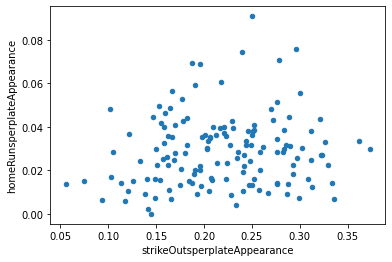

In [38]:
(american_league_batting_stats_red[['strikeOutsperplateAppearance','homeRunsperplateAppearance']]
.plot(kind = 'scatter', x = 'strikeOutsperplateAppearance', y = 'homeRunsperplateAppearance'))
plt.show()

In [39]:
american_league_batting_stats_red["normalized_avg"] = 100*(american_league_batting_stats_red["avg"]
                                                /american_league_batting_stats_red["avg"].mean())

american_league_batting_stats_red["normalized_ops"] = 100*(american_league_batting_stats_red["ops"]
                                                /american_league_batting_stats_red["ops"].mean())

american_league_batting_stats_red["normalized_runs"] = 100*(american_league_batting_stats_red["runs"]
                                                /american_league_batting_stats_red["runs"].mean())

american_league_batting_stats_red["normalized_stolenBases"] = 100*(american_league_batting_stats_red["stolenBases"]
                                                /american_league_batting_stats_red["stolenBases"].mean())

In [40]:
highest_bat_average_players = american_league_batting_stats_red["normalized_avg"].sort_values(ascending = False).head(+10)
american_league_batting_stats_red.loc[highest_bat_average_players.index,batting_stats_list]

,gamesPlayed,plateAppearances,strikeOuts,homeRuns,atBats,runs,stolenBases,avg,obp,slg,ops,playername
623912,40,307,43,5,282,38,3,0.330,0.371,0.447,0.818,Harold Ramirez
650333,22,467,35,7,419,69,4,0.322,0.388,0.432,0.820,Luis Arraez
608701,6,127,31,4,110,19,0,0.309,0.386,0.491,0.877,Rob Refsnyder
547989,25,538,87,14,475,68,0,0.307,0.383,0.457,0.840,Jose Abreu
650391,20,199,41,7,176,20,0,0.307,0.377,0.460,0.837,Eloy Jimenez
665926,18,413,83,15,368,49,15,0.304,0.369,0.495,0.864,Andres Gimenez
622534,13,223,39,3,204,26,5,0.304,0.363,0.431,0.794,Manuel Margot
672386,37,419,44,12,363,51,28,0.303,0.387,0.449,0.836,Alejandro Kirk
664059,56,130,34,4,119,22,10,0.303,0.349,0.479,0.828,Sam Haggerty
593428,3,500,98,11,442,69,7,0.301,0.372,0.448,0.820,Xander Bogaerts


In [41]:
test_df = american_league_players_df[batting_stats_list + ["playername"]].dropna().sort_values("avg", ascending = False)

Unfortunately, one can see with the Christian Vázquez (543877) example that the stats are team dependent.

In [42]:
highest_ops_players = american_league_batting_stats_red["normalized_ops"].sort_values(ascending = False).head(+10)
lowest_ops_players = american_league_batting_stats_red["normalized_ops"].sort_values(ascending = False).tail(+10)

american_league_batting_stats_red.loc[highest_ops_players.index,:]

,gamesPlayed,plateAppearances,strikeOuts,homeRuns,atBats,runs,stolenBases,avg,obp,slg,ops,playername,strikeOutsperplateAppearance,homeRunsperplateAppearance,normalized_avg,normalized_ops,normalized_runs,normalized_stolenBases
592450,19,539,135,49,454,101,14,0.297,0.397,0.665,1.062,Aaron Judge,0.250464,0.090909,120.039004,148.130157,250.659493,167.812238
670541,63,449,88,31,374,78,1,0.294,0.399,0.599,0.998,Yordan Alvarez,0.195991,0.069042,118.826489,139.203293,193.578619,11.986588
545361,5,355,105,27,310,58,1,0.271,0.363,0.600,0.963,Mike Trout,0.295775,0.076056,109.530539,134.321414,143.943075,11.986588
646240,3,473,84,25,433,68,2,0.300,0.357,0.554,0.911,Rafael Devers,0.177590,0.052854,121.251519,127.068337,168.760847,23.973177
608070,22,519,53,25,459,69,14,0.283,0.355,0.545,0.900,Jose Ramirez,0.102119,0.048170,114.380600,125.534032,171.242624,167.812238
664247,7,121,29,9,109,21,0,0.275,0.339,0.550,0.889,Kyle Garlick,0.239669,0.074380,111.147226,123.999727,52.117320,0.000000
608701,6,127,31,4,110,19,0,0.309,0.386,0.491,0.877,Rob Refsnyder,0.244094,0.031496,124.889065,122.325940,47.153766,0.000000
514888,2,469,69,21,410,71,12,0.283,0.371,0.505,0.876,Jose Altuve,0.147122,0.044776,114.380600,122.186458,176.206178,143.839061
665926,18,413,83,15,368,49,15,0.304,0.369,0.495,0.864,Andres Gimenez,0.200969,0.036320,122.868206,120.512670,121.607081,179.798826
665489,24,536,88,26,481,71,4,0.283,0.351,0.501,0.852,Vladimir Guerrero,0.164179,0.048507,114.380600,118.838883,176.206178,47.946354


In [43]:
american_league_batting_stats_red.loc[lowest_ops_players.index,:]

,gamesPlayed,plateAppearances,strikeOuts,homeRuns,atBats,runs,stolenBases,avg,obp,slg,ops,playername,strikeOutsperplateAppearance,homeRunsperplateAppearance,normalized_avg,normalized_ops,normalized_runs,normalized_stolenBases
663527,3,179,46,2,153,17,0,0.196,0.296,0.261,0.557,Tyler Nevin,0.256983,0.011173,79.217659,77.691617,42.190212,0.000000
669397,26,208,39,3,192,19,1,0.203,0.261,0.292,0.553,Nick Allen,0.187500,0.014423,82.046861,77.133688,47.153766,11.986588
455139,55,185,57,3,163,8,17,0.178,0.266,0.282,0.548,Robinson Chirinos,0.308108,0.016216,71.942568,76.436277,19.854217,203.772003
519390,17,139,31,5,120,12,11,0.158,0.252,0.292,0.544,Stephen Vogt,0.223022,0.035971,63.859133,75.878348,29.781326,131.852473
623205,110,310,102,7,285,34,13,0.200,0.240,0.302,0.542,Andrew Velazquez,0.329032,0.022581,80.834346,75.599384,84.380423,155.825650
435559,2,148,29,3,130,9,34,0.177,0.264,0.277,0.541,Kurt Suzuki,0.195946,0.020270,71.538396,75.459901,22.335994,407.544007
595978,79,255,57,6,221,21,39,0.181,0.262,0.276,0.538,Austin Hedges,0.223529,0.023529,73.155083,75.041455,52.117320,467.476949
664702,117,470,68,0,421,57,15,0.202,0.277,0.254,0.531,Myles Straw,0.144681,0.000000,81.642690,74.065079,141.461298,179.798826
544725,3,288,59,3,273,35,1,0.212,0.238,0.275,0.513,Leury Garcia,0.204861,0.010417,85.684407,71.554398,86.862201,11.986588
668731,2,137,41,1,125,14,4,0.192,0.263,0.224,0.487,Akil Baddoo,0.299270,0.007299,77.600972,67.927859,34.744880,47.946354


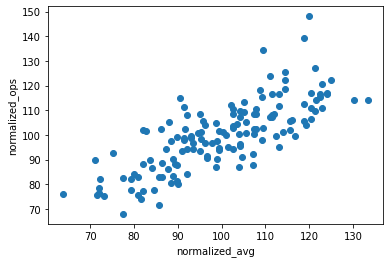

In [44]:
plt.scatter(american_league_batting_stats_red["normalized_avg"], american_league_batting_stats_red["normalized_ops"])
plt.xlabel("normalized_avg")
plt.ylabel("normalized_ops")
plt.show()

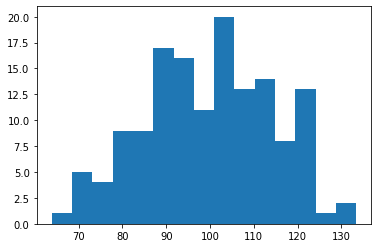

In [45]:
plt.hist(american_league_batting_stats_red["normalized_avg"].values, bins = 15)
plt.show()

In [46]:
american_league_batting_stats_red.sort_values("normalized_runs", ascending = False).head(+10)

,gamesPlayed,plateAppearances,strikeOuts,homeRuns,atBats,runs,stolenBases,avg,obp,slg,ops,playername,strikeOutsperplateAppearance,homeRunsperplateAppearance,normalized_avg,normalized_ops,normalized_runs,normalized_stolenBases
592450,19,539,135,49,454,101,14,0.297,0.397,0.665,1.062,Aaron Judge,0.250464,0.090909,120.039004,148.130157,250.659493,167.812238
670541,63,449,88,31,374,78,1,0.294,0.399,0.599,0.998,Yordan Alvarez,0.195991,0.069042,118.826489,139.203293,193.578619,11.986588
608324,121,518,63,19,438,77,1,0.269,0.371,0.477,0.848,Alex Bregman,0.121622,0.036680,108.722196,118.280954,191.096841,11.986588
543760,17,559,91,20,504,73,19,0.236,0.295,0.409,0.704,Marcus Semien,0.162791,0.035778,95.384528,98.195509,181.169733,227.745180
518934,7,489,65,12,422,72,4,0.277,0.372,0.405,0.777,DJ LeMahieu,0.132924,0.024540,111.955569,108.377714,178.687956,47.946354
665489,24,536,88,26,481,71,4,0.283,0.351,0.501,0.852,Vladimir Guerrero,0.164179,0.048507,114.380600,118.838883,176.206178,47.946354
608369,7,524,80,26,464,71,3,0.254,0.330,0.463,0.793,Corey Seager,0.152672,0.049618,102.659620,110.609430,176.206178,35.959765
514888,2,469,69,21,410,71,12,0.283,0.371,0.505,0.876,Jose Altuve,0.147122,0.044776,114.380600,122.186458,176.206178,143.839061
666969,9,518,147,20,481,71,21,0.256,0.301,0.449,0.750,Adolis Garcia,0.283784,0.038610,103.467963,104.611693,176.206178,251.718357
650333,22,467,35,7,419,69,4,0.322,0.388,0.432,0.820,Luis Arraez,0.074946,0.014989,130.143297,114.375451,171.242624,47.946354


In [47]:
american_league_batting_stats_red.sort_values("normalized_stolenBases", ascending = False).head(+10)

,gamesPlayed,plateAppearances,strikeOuts,homeRuns,atBats,runs,stolenBases,avg,obp,slg,ops,playername,strikeOutsperplateAppearance,homeRunsperplateAppearance,normalized_avg,normalized_ops,normalized_runs,normalized_stolenBases
641680,6,368,73,13,328,46,47,0.244,0.321,0.430,0.751,Jonah Heim,0.198370,0.035326,98.617902,104.751175,114.161749,563.369656
545358,1,311,91,7,276,25,40,0.192,0.280,0.312,0.592,Max Stassi,0.292605,0.022508,77.600972,82.573496,62.044429,479.463537
595978,79,255,57,6,221,21,39,0.181,0.262,0.276,0.538,Austin Hedges,0.223529,0.023529,73.155083,75.041455,52.117320,467.476949
669257,18,448,71,18,389,54,36,0.270,0.357,0.470,0.827,Will Smith,0.158482,0.040179,109.126367,115.351827,134.015967,431.517184
669221,21,475,97,16,418,53,36,0.254,0.333,0.445,0.778,Sean Murphy,0.204211,0.033684,102.659620,108.517196,131.534190,431.517184
435559,2,148,29,3,130,9,34,0.177,0.264,0.277,0.541,Kurt Suzuki,0.195946,0.020270,71.538396,75.459901,22.335994,407.544007
642336,2,235,55,6,228,29,31,0.254,0.272,0.404,0.676,Francisco Mejia,0.234043,0.025532,102.659620,94.290006,71.971538,371.584241
455117,93,314,98,12,285,31,29,0.179,0.241,0.347,0.588,Martin Maldonado,0.312102,0.038217,72.346740,82.015567,76.935092,347.611065
672386,37,419,44,12,363,51,28,0.303,0.387,0.449,0.836,Alejandro Kirk,0.105012,0.028640,122.464034,116.607167,126.570635,335.624476
622761,116,421,119,12,390,52,28,0.228,0.276,0.400,0.676,Jorge Mateo,0.282660,0.028504,92.151155,94.290006,129.052412,335.624476


In [54]:
american_league_batting_stats_red["strikeOutsperplateAppearance"].values[0]

0.12162162162162163